<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/JOB_A_THON_June_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement


A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers). 


Leads are captured in 2 ways - Directly and Indirectly. 


Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.


Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.


Now, as a data scientist, your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.

## About Dataset


You are provided with the leads data of last year containing both direct and indirect leads. Each lead provides information about their activity on the platform, signup information and campaign information. Based on his past activity on the platform, you need to build the predictive model to classify if the user would buy the product in the next 3 months or not.



## Data Dictionary


You are provided with 3 files - train.csv, test.csv and sample_submission.csv



## Training set


train.csv contains the leads information of last 1 year from Jan 2021 to Dec 2021. And also the target variable indicating if the user will buy the product in next 3 months or not 

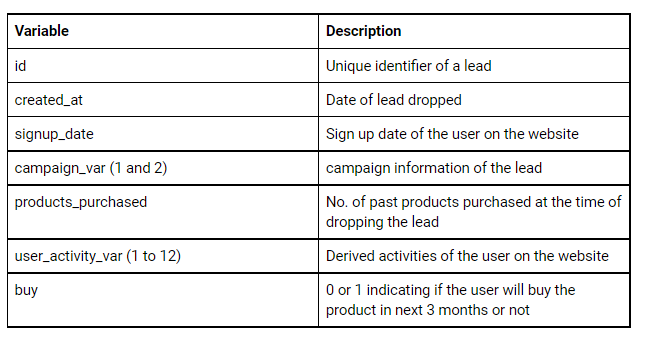



## Test set


test.csv contains the leads information of the current year from Jan 2022 to March 2022. You need to predict if the lead will buy the product in next 3 months or not.
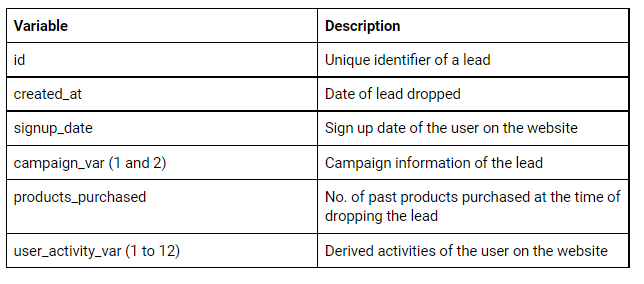


## Submission File Format


sample_submission.csv contains 2 variables - 
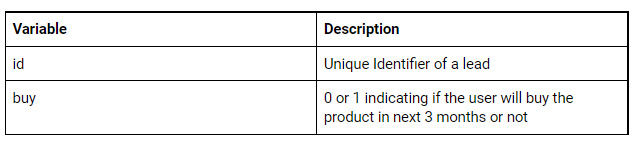


## Evaluation metric


The evaluation metric for this hackathon would be F1 Score of Class 1.

## Import Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#
import warnings
warnings.filterwarnings('ignore')
#
%matplotlib inline

In [2]:
train = pd.read_csv("/content/drive/MyDrive/AV_JOB_HACKATHON_2/D2C_lead_prediction/train_wn75k28.csv",parse_dates=['created_at','signup_date'])
train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [3]:
test= pd.read_csv("/content/drive/MyDrive/AV_JOB_HACKATHON_2/D2C_lead_prediction/test_Wf7sxXF.csv",parse_dates=['created_at','signup_date'])
test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaT,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


## Summary Staistics of sample data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39161 non-null  int64         
 1   created_at            39161 non-null  datetime64[ns]
 2   campaign_var_1        39161 non-null  int64         
 3   campaign_var_2        39161 non-null  int64         
 4   products_purchased    18250 non-null  float64       
 5   signup_date           24048 non-null  datetime64[ns]
 6   user_activity_var_1   39161 non-null  int64         
 7   user_activity_var_2   39161 non-null  int64         
 8   user_activity_var_3   39161 non-null  int64         
 9   user_activity_var_4   39161 non-null  int64         
 10  user_activity_var_5   39161 non-null  int64         
 11  user_activity_var_6   39161 non-null  int64         
 12  user_activity_var_7   39161 non-null  int64         
 13  user_activity_va

In [ ]:
train.shape,test.shape

((39161, 19), (13184, 18))

## Check for missing values

In [ ]:
train.isnull().sum()[train.isnull().sum() > 0] / len(train)

products_purchased    0.533975
signup_date           0.385920
dtype: float64

In [ ]:
test.isnull().sum()[test.isnull().sum() > 0] / len(test)

products_purchased    0.617112
signup_date           0.504323
dtype: float64

## Check for number of unique values having the same count as that of the number of samples

In [ ]:
train['id'].nunique()

39161

In [7]:
for i in train.columns.tolist():
  if train[i].nunique() == len(train):
    print(i)

id


In [8]:
for i in test.columns.tolist():
  if test[i].nunique() == len(test):
    print(i)

id


* Based on the above facts we will drop id, products_purchased,signup_date columns based on the % of missing values and unique samples

In [5]:
drop_cols = ['id','products_purchased','signup_date']
train_df = train.drop(drop_cols,axis=1)
test_df = test.drop(drop_cols,axis=1)

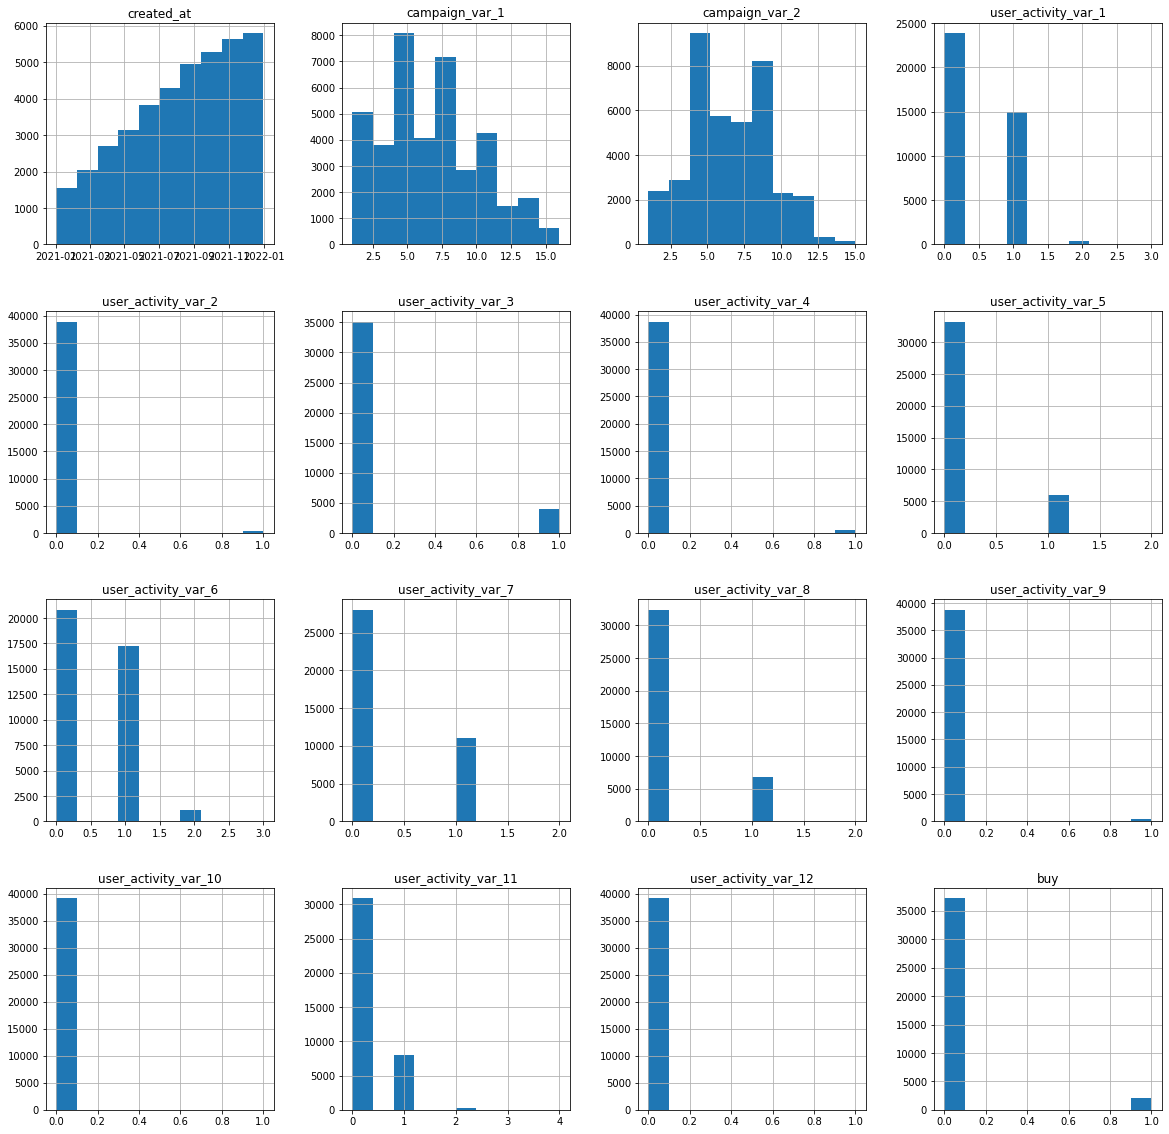

In [ ]:
train_df.hist(figsize = (20,20))
plt.show()

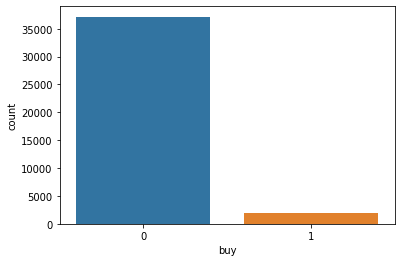

In [ ]:
sns.countplot(x='buy',data=train_df)
plt.show()

* The above count shows an imbalance in class distribution

## Check if any missing values exists in the new dataframe

In [ ]:
train_df.isnull().sum()[train_df.isnull().sum() > 0] / len(train_df)

Series([], dtype: float64)

In [ ]:
test_df.isnull().sum()[test_df.isnull().sum() > 0] / len(test_df)

Series([], dtype: float64)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   created_at            39161 non-null  datetime64[ns]
 1   campaign_var_1        39161 non-null  int64         
 2   campaign_var_2        39161 non-null  int64         
 3   user_activity_var_1   39161 non-null  int64         
 4   user_activity_var_2   39161 non-null  int64         
 5   user_activity_var_3   39161 non-null  int64         
 6   user_activity_var_4   39161 non-null  int64         
 7   user_activity_var_5   39161 non-null  int64         
 8   user_activity_var_6   39161 non-null  int64         
 9   user_activity_var_7   39161 non-null  int64         
 10  user_activity_var_8   39161 non-null  int64         
 11  user_activity_var_9   39161 non-null  int64         
 12  user_activity_var_10  39161 non-null  int64         
 13  user_activity_va

In [6]:
train_df['Year'] = train_df['created_at'].dt.year
train_df['Month'] = train_df['created_at'].dt.month
train_df['Day_of_week'] = train_df['created_at'].dt.weekday

In [7]:
test_df['Year'] = test_df['created_at'].dt.year
test_df['Month'] = test_df['created_at'].dt.month
test_df['Day_of_week'] = test_df['created_at'].dt.weekday

In [8]:
train_df.head()

,created_at,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,Year,Month,Day_of_week
0,2021-01-01,1,2,0,0,0,0,0,0,1,1,0,0,0,0,0,2021,1,4
1,2021-01-01,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,2021,1,4
2,2021-01-01,9,3,1,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,4
3,2021-01-01,6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,4
4,2021-01-01,4,6,0,0,0,0,0,0,1,0,0,0,1,0,0,2021,1,4


In [9]:
test_df.head()

,created_at,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,Year,Month,Day_of_week
0,2022-01-01,2,2,1,1,0,0,0,1,0,0,0,0,1,0,2022,1,5
1,2022-01-01,4,7,1,0,0,0,0,0,0,1,0,0,0,0,2022,1,5
2,2022-01-01,8,7,0,0,0,0,1,1,0,0,0,0,0,0,2022,1,5
3,2022-01-01,9,8,0,0,0,0,1,1,1,0,0,0,2,0,2022,1,5
4,2022-01-01,4,5,1,0,0,0,0,0,0,0,0,0,0,0,2022,1,5


* since test data has data to be predicted for year 2022 while train data has data for year 2021 so dropping the year and created on columns

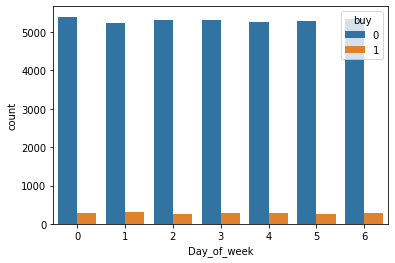

In [ ]:
sns.countplot(x='Day_of_week',data=train_df,hue='buy')
plt.show()

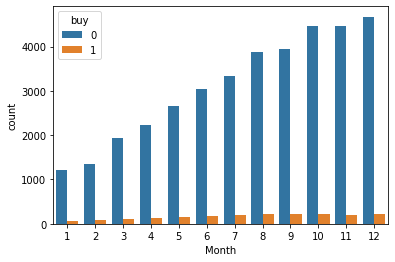

In [ ]:
sns.countplot(x='Month',data=train_df,hue='buy')
plt.show()

* the above plot shows that there is equal buys throught the week and it increase as with months passing by while the % of  no buys increases with months passing by

In [10]:
train_df = train_df.drop(['created_at','Year'],axis=1)
test_df = test_df.drop(['created_at','Year'],axis=1)

In [11]:
train_df = train_df[['campaign_var_1', 'campaign_var_2', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'Month',
       'Day_of_week', 'buy']]

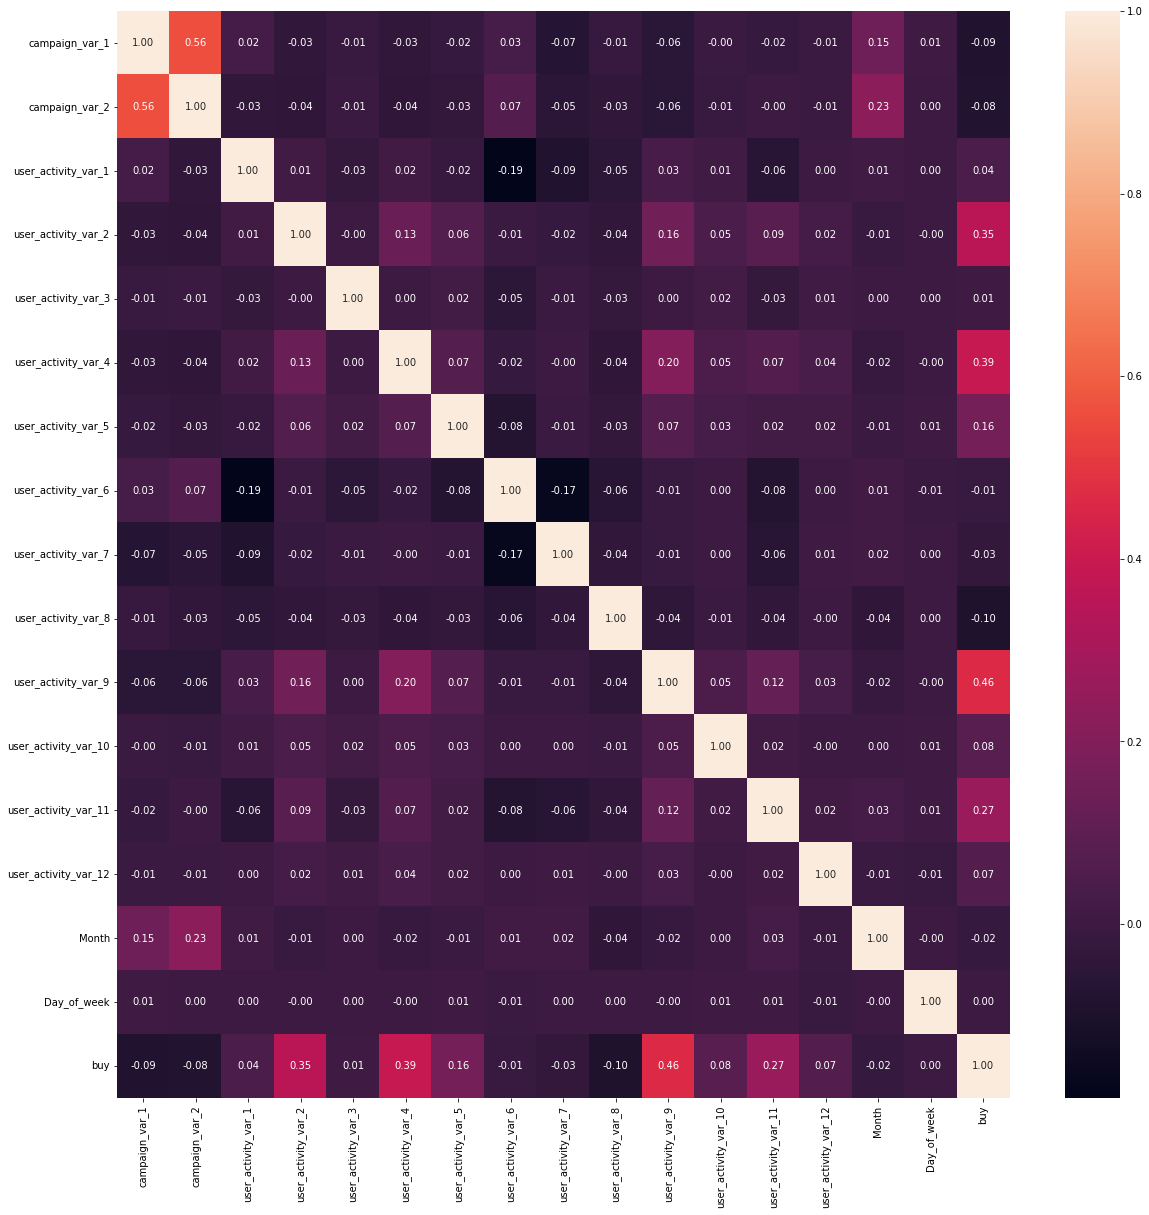

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(),annot=True,fmt=".2f")
plt.show()

## Separate Independent Varaibales and Dependent Variables

In [ ]:
X = train_df.drop('buy',axis=1)
Y = train_df['buy']

## Startified Kfold Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

## Using Catboost Algorith to build Model

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


Running 1 iteration for depth 3
ROC AUC Score : 0.9293079846629894 for split 1
ROC AUC Score : 0.9202924572294452 for split 2
ROC AUC Score : 0.9254531795653536 for split 3
ROC AUC Score : 0.9164133140473627 for split 4
ROC AUC Score : 0.9154615177610335 for split 5
Running 2 iteration for depth 3
ROC AUC Score : 0.9203405421767793 for split 1
ROC AUC Score : 0.921931830787786 for split 2
ROC AUC Score : 0.914979160534189 for split 3
ROC AUC Score : 0.9362570640473628 for split 4
ROC AUC Score : 0.9185979547900968 for split 5
Running 3 iteration for depth 3
ROC AUC Score : 0.9325023543656666 for split 1
ROC AUC Score : 0.9229797890393953 for split 2
ROC AUC Score : 0.9128685766616191 for split 3
ROC AUC Score : 0.9270761571582347 for split 4
ROC AUC Score : 0.9130663011302476 for split 5
Running 4 iteration for depth 3
ROC AUC Score : 0.9240209202206376 for split 1
ROC AUC Score : 0.9112544916711258 for split 2
ROC AUC Score : 0.9151172361146375 for split 3
ROC AUC Score : 0.9150881324

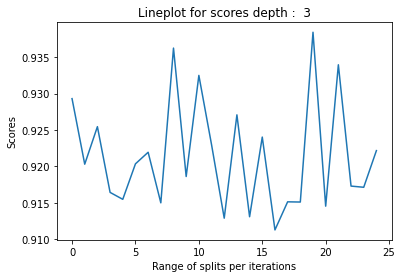

 min score : 0.9112544916711258,max_score : 0.9384364908503766,average_score :0.9214595807818158
Running 1 iteration for depth 5
ROC AUC Score : 0.920563870577156 for split 1
ROC AUC Score : 0.9118539993195689 for split 2
ROC AUC Score : 0.9062505584558732 for split 3
ROC AUC Score : 0.9107444160387512 for split 4
ROC AUC Score : 0.9176688643702906 for split 5
Running 2 iteration for depth 5
ROC AUC Score : 0.9194692587111528 for split 1
ROC AUC Score : 0.9108508861282765 for split 2
ROC AUC Score : 0.9204760522320194 for split 3
ROC AUC Score : 0.9199492061356297 for split 4
ROC AUC Score : 0.9055257669537138 for split 5
Running 3 iteration for depth 5
ROC AUC Score : 0.9165585900713036 for split 1
ROC AUC Score : 0.8918645665691203 for split 2
ROC AUC Score : 0.9119570080859352 for split 3
ROC AUC Score : 0.9216533234660924 for split 4
ROC AUC Score : 0.9144419402583422 for split 5
Running 4 iteration for depth 5
ROC AUC Score : 0.9105815283196554 for split 1
ROC AUC Score : 0.907300

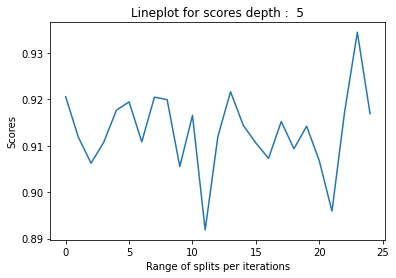

 min score : 0.8918645665691203,max_score : 0.9344713737890205,average_score :0.9131189591741417
Running 1 iteration for depth 7
ROC AUC Score : 0.9128834252657069 for split 1
ROC AUC Score : 0.8950059124671627 for split 2
ROC AUC Score : 0.9014925987105528 for split 3
ROC AUC Score : 0.911247477125942 for split 4
ROC AUC Score : 0.8994172160925726 for split 5
Running 2 iteration for depth 7
ROC AUC Score : 0.8967872998789184 for split 1
ROC AUC Score : 0.9031382101156293 for split 2
ROC AUC Score : 0.9130526774355504 for split 3
ROC AUC Score : 0.8967539020452098 for split 4
ROC AUC Score : 0.9114146595801937 for split 5
Running 3 iteration for depth 7
ROC AUC Score : 0.9004696959504911 for split 1
ROC AUC Score : 0.9024373796053433 for split 2
ROC AUC Score : 0.9037866089952447 for split 3
ROC AUC Score : 0.9064800861141012 for split 4
ROC AUC Score : 0.8948567007534984 for split 5
Running 4 iteration for depth 7
ROC AUC Score : 0.907102280371317 for split 1
ROC AUC Score : 0.9090245

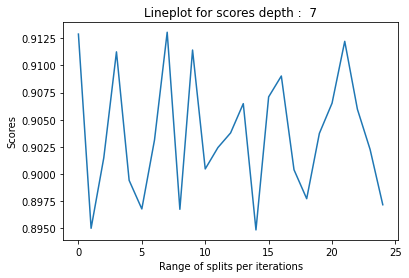

 min score : 0.8948567007534984,max_score : 0.9130526774355504,average_score :0.9036543339741823
Running 1 iteration for depth 10
ROC AUC Score : 0.8974988228171668 for split 1
ROC AUC Score : 0.896839502226574 for split 2
ROC AUC Score : 0.8838364578201862 for split 3
ROC AUC Score : 0.8964898412271259 for split 4
ROC AUC Score : 0.899943487621098 for split 5
Running 2 iteration for depth 10
ROC AUC Score : 0.8764136284138302 for split 1
ROC AUC Score : 0.8885569904850921 for split 2
ROC AUC Score : 0.8934596008385015 for split 3
ROC AUC Score : 0.9145351184068892 for split 4
ROC AUC Score : 0.89975477664155 for split 5
Running 3 iteration for depth 10
ROC AUC Score : 0.9023385577828602 for split 1
ROC AUC Score : 0.8825455607267866 for split 2
ROC AUC Score : 0.8827080819228214 for split 3
ROC AUC Score : 0.8931961450484392 for split 4
ROC AUC Score : 0.9095840621636169 for split 5
Running 4 iteration for depth 10
ROC AUC Score : 0.8831718350598681 for split 1
ROC AUC Score : 0.90269

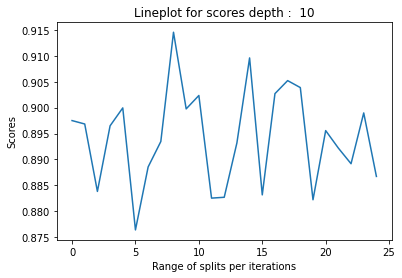

 min score : 0.8764136284138302,max_score : 0.9145351184068892,average_score :0.8943002530679385


In [ ]:
from catboost import CatBoostClassifier

for depth in [3,5,7,10]:
  iterations = 5
  scores = []
  scores_val = []
  target = Y
  temp = X
  predictions = []
  for i in range(iterations):
    print(f'Running {i+1} iteration for depth {depth}')
    
    kfold = StratifiedKFold(n_splits = 5, shuffle=True)
    split = 0
    for train_index,test_index in kfold.split(temp,target):
      split = split +1
      xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
      ytrain,ytest = target[train_index],target[test_index]
        
        #model  = CatBoostClassifier(learning_rate = 0.04627007502666947, n_estimators =1483, random_state = 60)    
      model = CatBoostClassifier(max_depth=depth,
                                   random_state=60,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=1000,verbose=0)
      model.fit(xtrain,ytrain)
            
      preds = model.predict_proba(xtest)[:,1]
        
      print(f"ROC AUC Score : {roc_auc_score(ytest,preds)} for split {split}")
      scores.append(roc_auc_score(ytest,preds))
      #
#
#        
  print('-----------KFOLD--------------')
  print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
  plt.title(f"Lineplot for scores depth :  {depth}")
  plt.xlabel('Range of splits per iterations')
  plt.ylabel('Scores')
  plt.show()
  print(f" min score : {min(scores)},max_score : {max(scores)},average_score :{np.mean(scores)}")

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,stratify=Y,random_state=42)
#
model  = model = CatBoostClassifier(max_depth=3,
                                   random_state=60,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=1500,verbose=0)
model.fit(X_train,y_train)

Running 1 iteration
0.9214884636082337
0.9158221127957793
0.9261786242816782
0.9282016953713671
0.9162229211517761
Running 2 iteration
0.9232628144759855
0.9314003763613257
0.914916107705022
0.9158207750269106
0.9202366455866522
Running 3 iteration
0.9210853625723128
0.9084149226827326
0.9279356739757371
0.9206103673304629
0.9285752489235737
Running 4 iteration
0.9313830216601642
0.9170374813665403
0.9314050968939906
0.9223859660925726
0.9023773883207749
Running 5 iteration
0.9202285416386384
0.9134817401366999
0.9187161365002712
0.9144298304628633
0.9338973358449947
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.9023773883207749 0.9338973358449947 0.9210205860306825


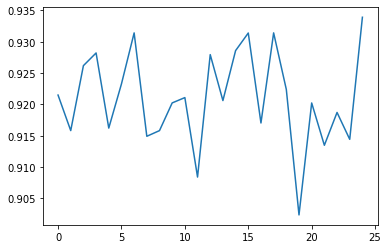

In [ ]:
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 5, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        #model  = CatBoostClassifier(learning_rate = 0.04627007502666947, n_estimators =1483, random_state = 60)    
        model = CatBoostClassifier(max_depth=3,
                                   random_state=60,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=1500,verbose=0)
        model.fit(xtrain,ytrain)
            
        preds = model.predict_proba(xtest)[:,1]
        
        print(roc_auc_score(ytest,preds))
        scores.append(roc_auc_score(ytest,preds))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

## Ligtgbm Classifier

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
y_pred =model.predict(X_test)

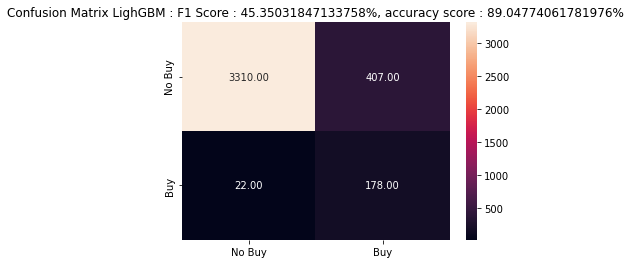

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3717
           1       0.30      0.89      0.45       200

    accuracy                           0.89      3917
   macro avg       0.65      0.89      0.70      3917
weighted avg       0.96      0.89      0.91      3917



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['No Buy','Buy'],yticklabels=['No Buy','Buy'])
plt.title(f"Confusion Matrix LighGBM : F1 Score : {f1_score(y_test,y_pred)* 100.0}%, accuracy score : {accuracy_score(y_test,y_pred) * 100.0}%")
plt.show()
print(classification_report(y_test,y_pred))

## For better accuracy
* Use large max_bin (may be slower).
* Use small learning_rate with large num_iterations
* Use large num_leaves(may cause over-fitting)
* Use bigger training data
* Try dart
* Try to use categorical feature directly.

## For Faster Speed
* Use bagging by setting bagging_fraction and bagging_freq.
* Use feature sub-sampling by setting feature_fraction.
* Use small max_bin.
* Use save_binary to speed up data loading in future learning.

## To deal with over-fitting
* Use small max_bin
* Use small num_leaves
* Use min_data_in_leaf and min_sum_hessian_in_leaf
* Use bagging by set bagging_fraction and bagging_freq
* Use feature sub-sampling by set feature_fraction
* Use bigger training data
* Try lambda_l1, lambda_l2 and min_gain_to_split to regularization
* Try max_depth to avoid growing deep tree

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rs_params = {

        'bagging_fraction': (0.5, 0.8),
        'bagging_frequency': (5, 8),

        'feature_fraction': (0.5, 0.8),
        'max_depth': (10, 13),
        'min_data_in_leaf': (90, 120),
        'num_leaves': (1200, 1550)

}

In [ ]:
# Initialize a RandomizedSearchCV object using 5-fold CV-
rs_cv = RandomizedSearchCV(estimator=lgb.LGBMClassifier(random_state=42), param_distributions=rs_params, cv = 5, n_iter=100,verbose=1)

# Train on training data-
rs_cv.fit(X, Y,verbose=1)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_iter=100,
                   param_distributions={'bagging_fraction': (0.5, 0.8),
                                        'bagging_frequency': (5, 8),
                                        'feature_fraction': (0.5, 0.8),
                                        'max_depth': (10, 13),
                                        'min_data_in_leaf': (90, 120),
                                        'num_leaves': (1200, 1550)},
                   verbose=1)

In [ ]:
rs_cv.best_estimator_

LGBMClassifier(bagging_fraction=0.5, bagging_frequency=5, feature_fraction=0.5,
               max_depth=10, min_data_in_leaf=120, num_leaves=1200,
               random_state=42)

In [ ]:
rs_cv.best_params_

{'bagging_fraction': 0.5,
 'bagging_frequency': 5,
 'feature_fraction': 0.5,
 'max_depth': 10,
 'min_data_in_leaf': 120,
 'num_leaves': 1200}

## Make Predictions for CatboostClassifier

In [ ]:
y_pred = rs_cv.best_estimator_.predict(X_test)

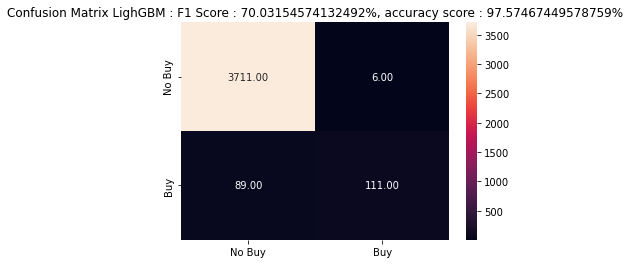

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3717
           1       0.95      0.56      0.70       200

    accuracy                           0.98      3917
   macro avg       0.96      0.78      0.84      3917
weighted avg       0.98      0.98      0.97      3917



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['No Buy','Buy'],yticklabels=['No Buy','Buy'])
plt.title(f"Confusion Matrix LighGBM : F1 Score : {f1_score(y_test,y_pred)* 100.0}%, accuracy score : {accuracy_score(y_test,y_pred) * 100.0}%")
plt.show()
print(classification_report(y_test,y_pred))

Running 1 iteration
0.9061570450010876
0.9107641358596636
Running 2 iteration
0.9030008643882286
0.9174411212245559
Running 3 iteration
0.9086708600754452
0.907835072573246
Running 4 iteration
0.911013801445402
0.9134783833938884
Running 5 iteration
0.906244232608456
0.9151445186104246
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.9030008643882286 0.9174411212245559 0.90997500351804


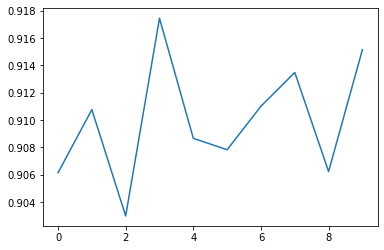

In [ ]:
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
         
        model = rs_cv.best_estimator_
        model.fit(xtrain,ytrain)
            
        preds = model.predict_proba(xtest)[:,1]
        
        print(roc_auc_score(ytest,preds))
        scores.append(roc_auc_score(ytest,preds))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

In [ ]:
rs_cv.best_estimator_.fit(X,Y)
y_pred = rs_cv.best_estimator_.predict(X_test)

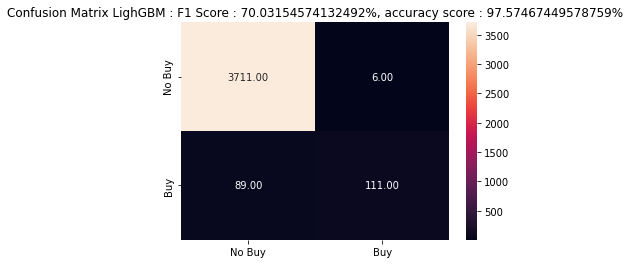

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3717
           1       0.95      0.56      0.70       200

    accuracy                           0.98      3917
   macro avg       0.96      0.78      0.84      3917
weighted avg       0.98      0.98      0.97      3917



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['No Buy','Buy'],yticklabels=['No Buy','Buy'])
plt.title(f"Confusion Matrix LighGBM : F1 Score : {f1_score(y_test,y_pred)* 100.0}%, accuracy score : {accuracy_score(y_test,y_pred) * 100.0}%")
plt.show()
print(classification_report(y_test,y_pred))

In [ ]:
pred = rs_cv.best_estimator_.predict(test_df[X.columns])

In [ ]:
p = test[['id']].copy()
p['buy'] = pred
p.head()

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0


In [ ]:
p.to_csv("lightgbm.csv",index=False)

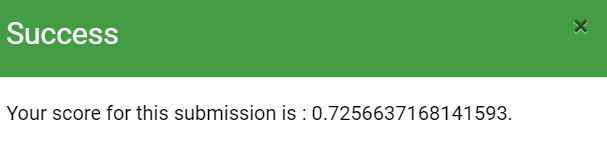

## Deduce accuracy of the model

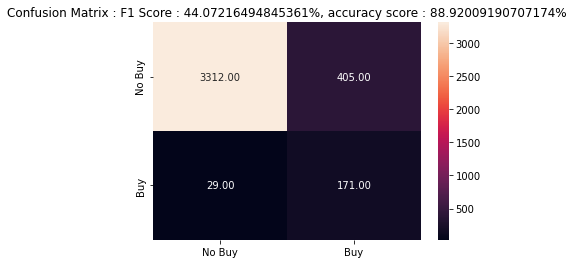

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['No Buy','Buy'],yticklabels=['No Buy','Buy'])
plt.title(f"Confusion Matrix : F1 Score : {f1_score(y_test,y_pred)* 100.0}%, accuracy score : {accuracy_score(y_test,y_pred) * 100.0}%")
plt.show()

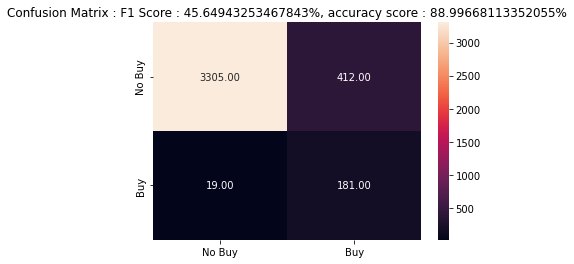

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['No Buy','Buy'],yticklabels=['No Buy','Buy'])
plt.title(f"Confusion Matrix : F1 Score : {f1_score(y_test,y_pred)* 100.0}%, accuracy score : {accuracy_score(y_test,y_pred) * 100.0}%")
plt.show()

# Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3717
           1       0.31      0.91      0.46       200

    accuracy                           0.89      3917
   macro avg       0.65      0.90      0.70      3917
weighted avg       0.96      0.89      0.91      3917



* iterations 1500

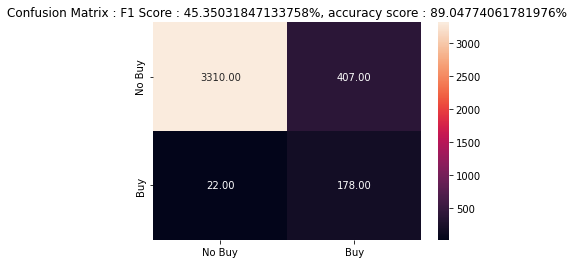

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3717
           1       0.30      0.89      0.45       200

    accuracy                           0.89      3917
   macro avg       0.65      0.89      0.70      3917
weighted avg       0.96      0.89      0.91      3917



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['No Buy','Buy'],yticklabels=['No Buy','Buy'])
plt.title(f"Confusion Matrix : F1 Score : {f1_score(y_test,y_pred)* 100.0}%, accuracy score : {accuracy_score(y_test,y_pred) * 100.0}%")
plt.show()
print(classification_report(y_test,y_pred))

# Make Predictions

In [ ]:
pred = model.predict(test_df)

In [ ]:
test_df = test[['id']].copy()

In [ ]:
test_df['buy'] = pred
test_df.head()

,id,buy
0,39162,1
1,39163,0
2,39164,1
3,39165,1
4,39166,0


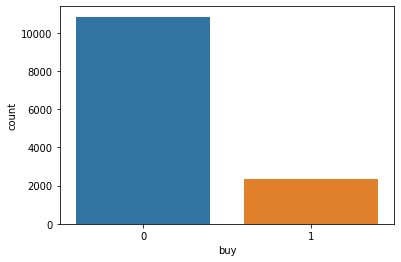

In [ ]:
sns.countplot(x='buy',data=test_df)

## download the predictions into a csv file 

In [ ]:
test_df.to_csv("catboost_hyperopt_boost_1500_max_depth_3.csv",index=False)

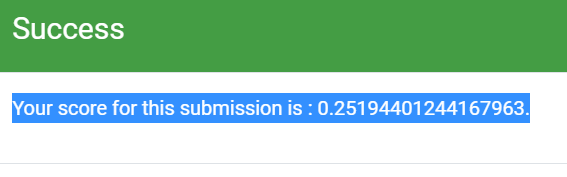

## Pycaret

In [2]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.4 MB/s 
     |████████████████████████████████| 262 kB 43.2 MB/s 
     |████████████████████████████████| 2.0 MB 8.4 MB/s 
     |████████████████████████████████| 6.8 MB 42.5 MB/s 
     |████████████████████████████████| 1.7 MB 13.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 15.1 MB/s 
     |████████████████████████████████| 56 kB 2.7 MB/s 
     |████████████████████████████████| 88 kB 7.0 MB/s 
     |████████████████████████████████| 120 kB 39.9 MB/s 
     |████████████████████████████████| 1.3 MB 43.1 MB/s 
     |████████████████████████████████| 17.8 MB 36.5 MB/s 
     |████████████████████████████████| 53.2 MB 125 kB/s 
     |████████████████████████████████| 1

In [1]:
! pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [12]:
import jinja2
from pycaret.classification import *

In [13]:
clf = setup(train_df, target='buy', fix_imbalance=True,session_id=42)

,Description,Value
0,session_id,42
1,Target,buy
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(39161, 17)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
lgt = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9737,0.9078,0.5286,0.9250,0.6727,0.6601,0.6883
1,0.9734,0.8950,0.5143,0.9351,0.6636,0.6509,0.6827
2,0.9774,0.9195,0.6115,0.9140,0.7328,0.7214,0.7374
3,0.9704,0.8782,0.4676,0.9028,0.6161,0.6024,0.6378
4,0.9763,0.9191,0.5899,0.9111,0.7162,0.7044,0.7225
5,0.9745,0.9127,0.5180,0.9600,0.6729,0.6608,0.6951
6,0.9715,0.9146,0.4964,0.8961,0.6389,0.6253,0.6551
7,0.9774,0.8972,0.6115,0.9140,0.7328,0.7214,0.7374
8,0.9737,0.8951,0.5108,0.9467,0.6636,0.6512,0.6849


In [17]:
tuned_clf = tune_model(lgt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9752,0.9047,0.5357,0.9615,0.6881,0.6762,0.7078
1,0.9730,0.8917,0.5143,0.9231,0.6606,0.6477,0.6779
2,0.9770,0.9184,0.6043,0.9130,0.7273,0.7158,0.7324
3,0.9701,0.8809,0.4532,0.9130,0.6058,0.5920,0.6316
4,0.9756,0.9219,0.5899,0.8913,0.7100,0.6977,0.7140
5,0.9745,0.9056,0.5108,0.9726,0.6698,0.6579,0.6950
6,0.9715,0.9170,0.4964,0.8961,0.6389,0.6253,0.6551
7,0.9767,0.8934,0.5899,0.9213,0.7193,0.7077,0.7269
8,0.9741,0.9044,0.5108,0.9595,0.6667,0.6545,0.6899


In [18]:
print(tuned_clf)

LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [19]:
evaluate_model(tuned_clf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

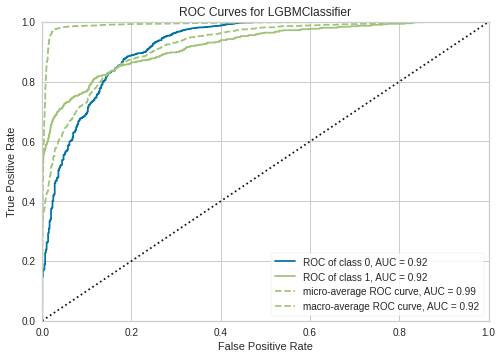

In [20]:
plot_model(tuned_clf, plot = 'auc')

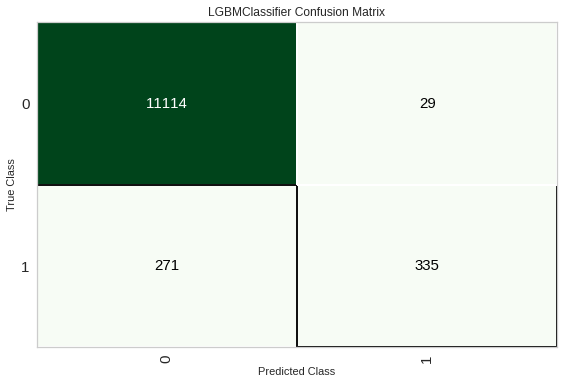

In [21]:
plot_model(tuned_clf, plot = 'confusion_matrix')

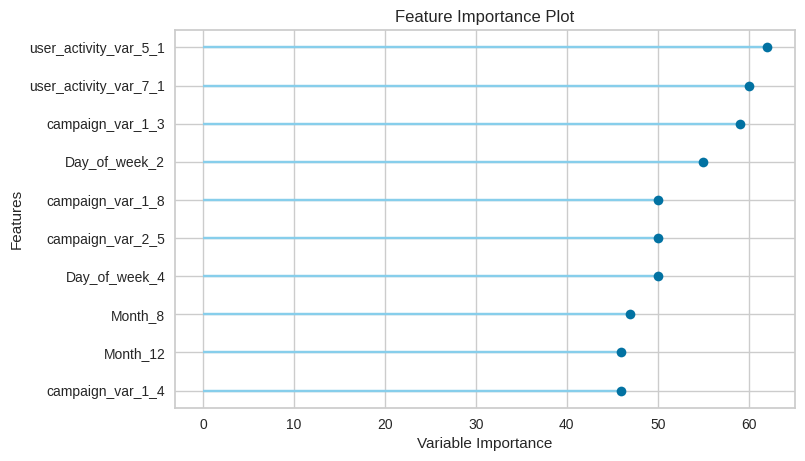

In [22]:
plot_model(tuned_clf, plot='feature')

In [23]:
predictions = predict_model(tuned_clf, data=test_df)
predictions.head()

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,Month,Day_of_week,Label,Score
0,2,2,1,1,0,0,0,1,0,0,0,0,1,0,1,5,1,0.9937
1,4,7,1,0,0,0,0,0,0,1,0,0,0,0,1,5,0,0.9974
2,8,7,0,0,0,0,1,1,0,0,0,0,0,0,1,5,0,0.8897
3,9,8,0,0,0,0,1,1,1,0,0,0,2,0,1,5,1,0.9922
4,4,5,1,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0.9704


<AxesSubplot:xlabel='Label', ylabel='count'>

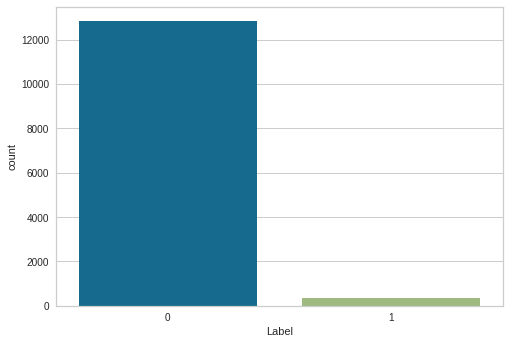

In [24]:
sns.countplot(x='Label',data=predictions)

In [25]:
pycaret1 = test[['id']].copy()
pycaret1['buy'] = predictions['Label']

In [26]:
pycaret1.to_csv("pycaret1.csv",index=False)

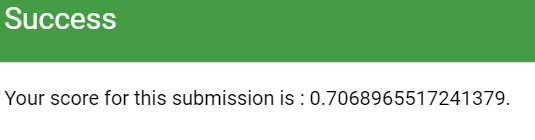

## Comapre Models

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9743,0.9077,0.5388,0.9242,0.6794,0.6671,0.6942,1.810
catboost,CatBoost Classifier,0.9742,0.9052,0.5352,0.9255,0.6770,0.6646,0.6923,37.752
xgboost,Extreme Gradient Boosting,0.9736,0.9030,0.5280,0.9177,0.6689,0.6563,0.6843,14.367
rf,Random Forest Classifier,0.9715,0.8759,0.5316,0.8517,0.6532,0.6392,0.6593,5.251
et,Extra Trees Classifier,0.9698,0.8639,0.5388,0.8037,0.6432,0.6281,0.6428,7.308
gbc,Gradient Boosting Classifier,0.9667,0.9042,0.5984,0.7023,0.6453,0.6279,0.6306,9.531
dt,Decision Tree Classifier,0.9533,0.7637,0.5539,0.5408,0.5460,0.5215,0.5222,0.592
dummy,Dummy Classifier,0.9492,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.255
ada,Ada Boost Classifier,0.9464,0.8998,0.6372,0.4816,0.5468,0.5190,0.5257,2.507
lr,Logistic Regression,0.8809,0.9098,0.7666,0.2667,0.3954,0.3461,0.4063,3.895


In [ ]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

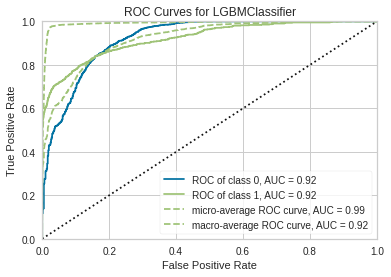

In [ ]:
plot_model(best_model, plot = 'auc')

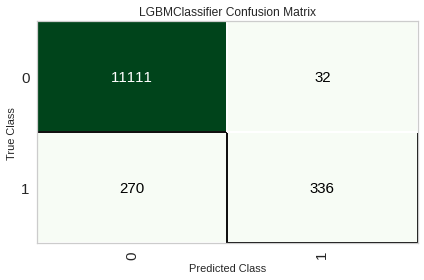

In [ ]:
plot_model(best_model, plot = 'confusion_matrix')

## Predictions

In [ ]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9743,0.9213,0.5545,0.913,0.6899,0.6774,0.7004


,campaign_var_1_1,campaign_var_1_10,campaign_var_1_11,campaign_var_1_12,campaign_var_1_13,campaign_var_1_14,campaign_var_1_15,campaign_var_1_16,campaign_var_1_2,campaign_var_1_3,...,Day_of_week_0,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,buy,Label,Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9983
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9940
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9891
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9862
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9930
11745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9967
11746,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9496
11747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9891


## To generate labels on the unseen (new) dataset, simply pass the dataset in the predict_model function

In [ ]:
predictions = predict_model(best_model, data=test_df)
predictions.head()

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,Month,Day_of_week,Label,Score
0,2,2,1,1,0,0,0,1,0,0,0,0,1,0,1,5,1,0.9988
1,4,7,1,0,0,0,0,0,0,1,0,0,0,0,1,5,0,0.9981
2,8,7,0,0,0,0,1,1,0,0,0,0,0,0,1,5,0,0.8664
3,9,8,0,0,0,0,1,1,1,0,0,0,2,0,1,5,1,0.9923
4,4,5,1,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0.9709


<AxesSubplot:xlabel='Label', ylabel='count'>

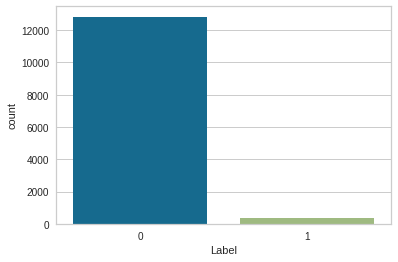

In [ ]:
sns.countplot(x='Label',data=predictions)

In [ ]:
pycaret = test[['id']].copy()
pycaret['buy'] = predictions['Label']

In [ ]:
pycaret.head()

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0


In [ ]:
pycaret.to_csv("pycaret.csv",index=False)

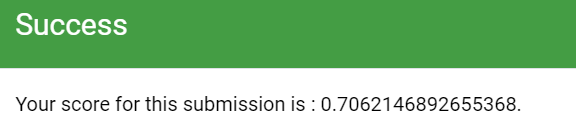

## Model Explainability

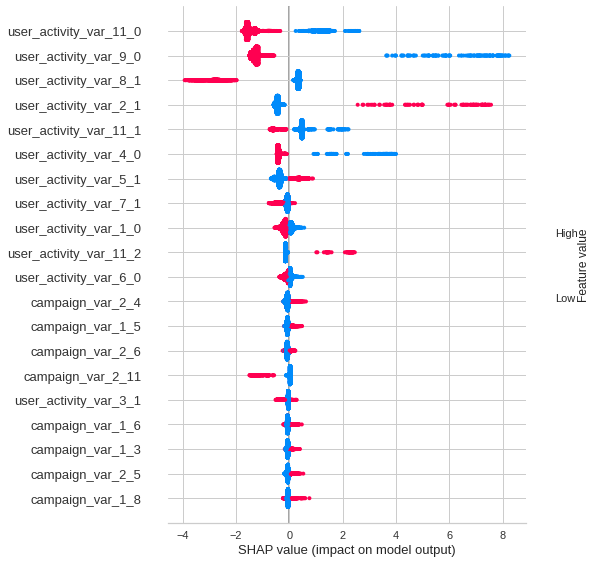

In [ ]:
interpret_model(best_model)

## Morris Sensitivity Analysis

In [ ]:
interpret_model(best_model,plot = 'msa')

## Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using ExplainerDashboard

In [ ]:
dashboard(best_model)

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


 98%|===================| 11565/11749 [01:07<00:01]       

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.2:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>

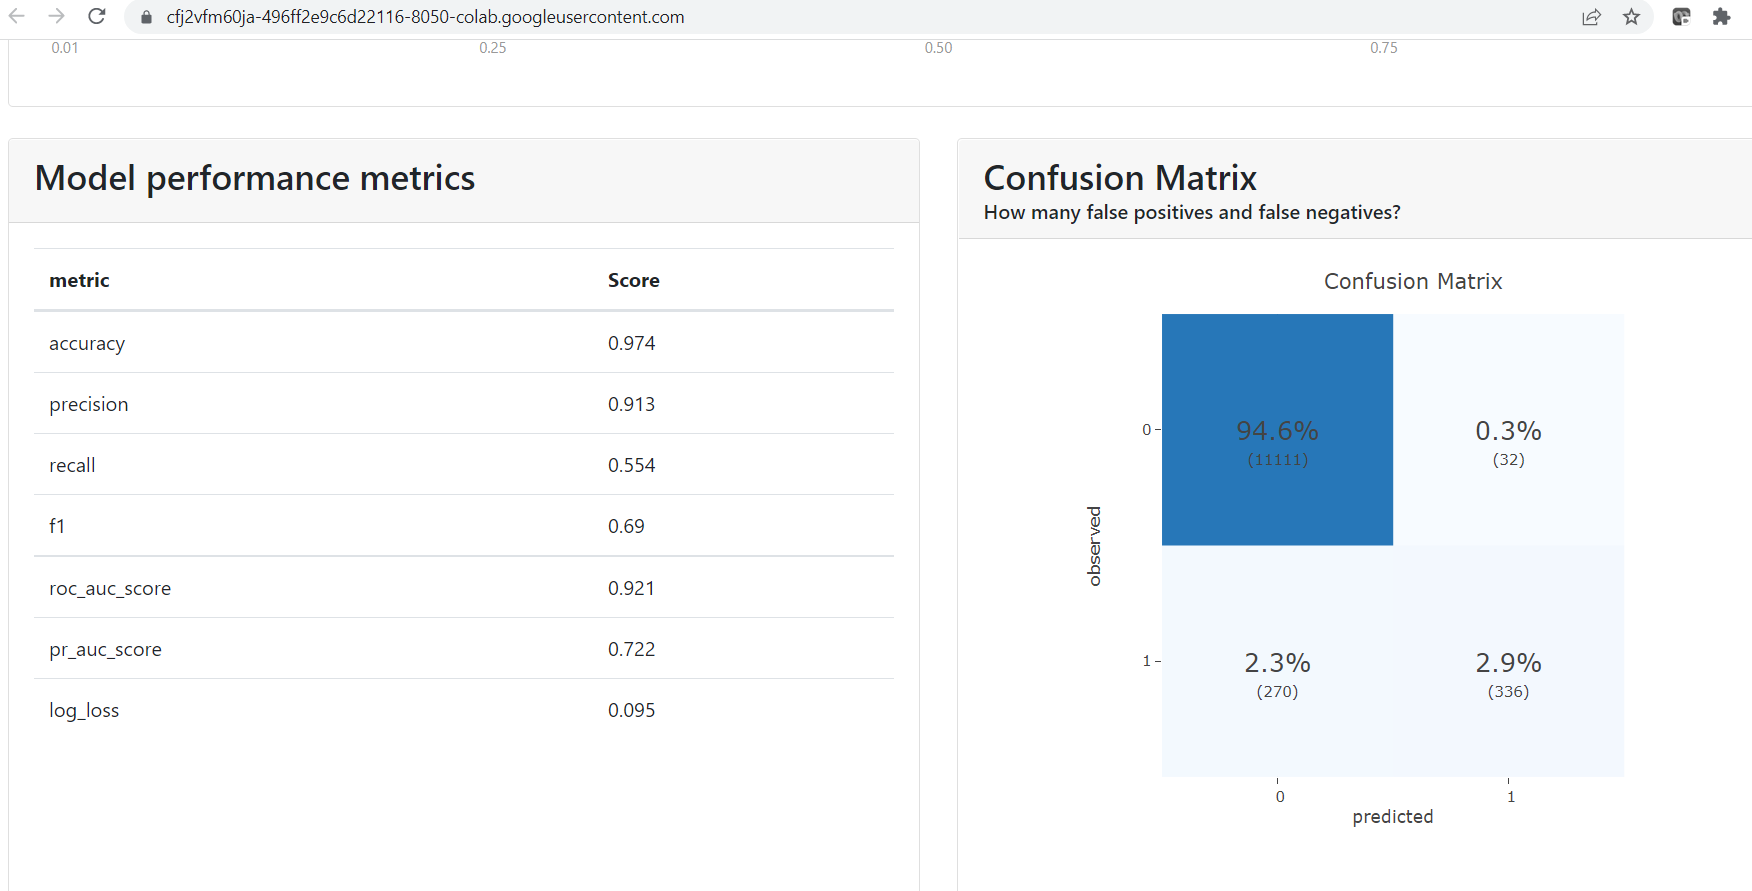

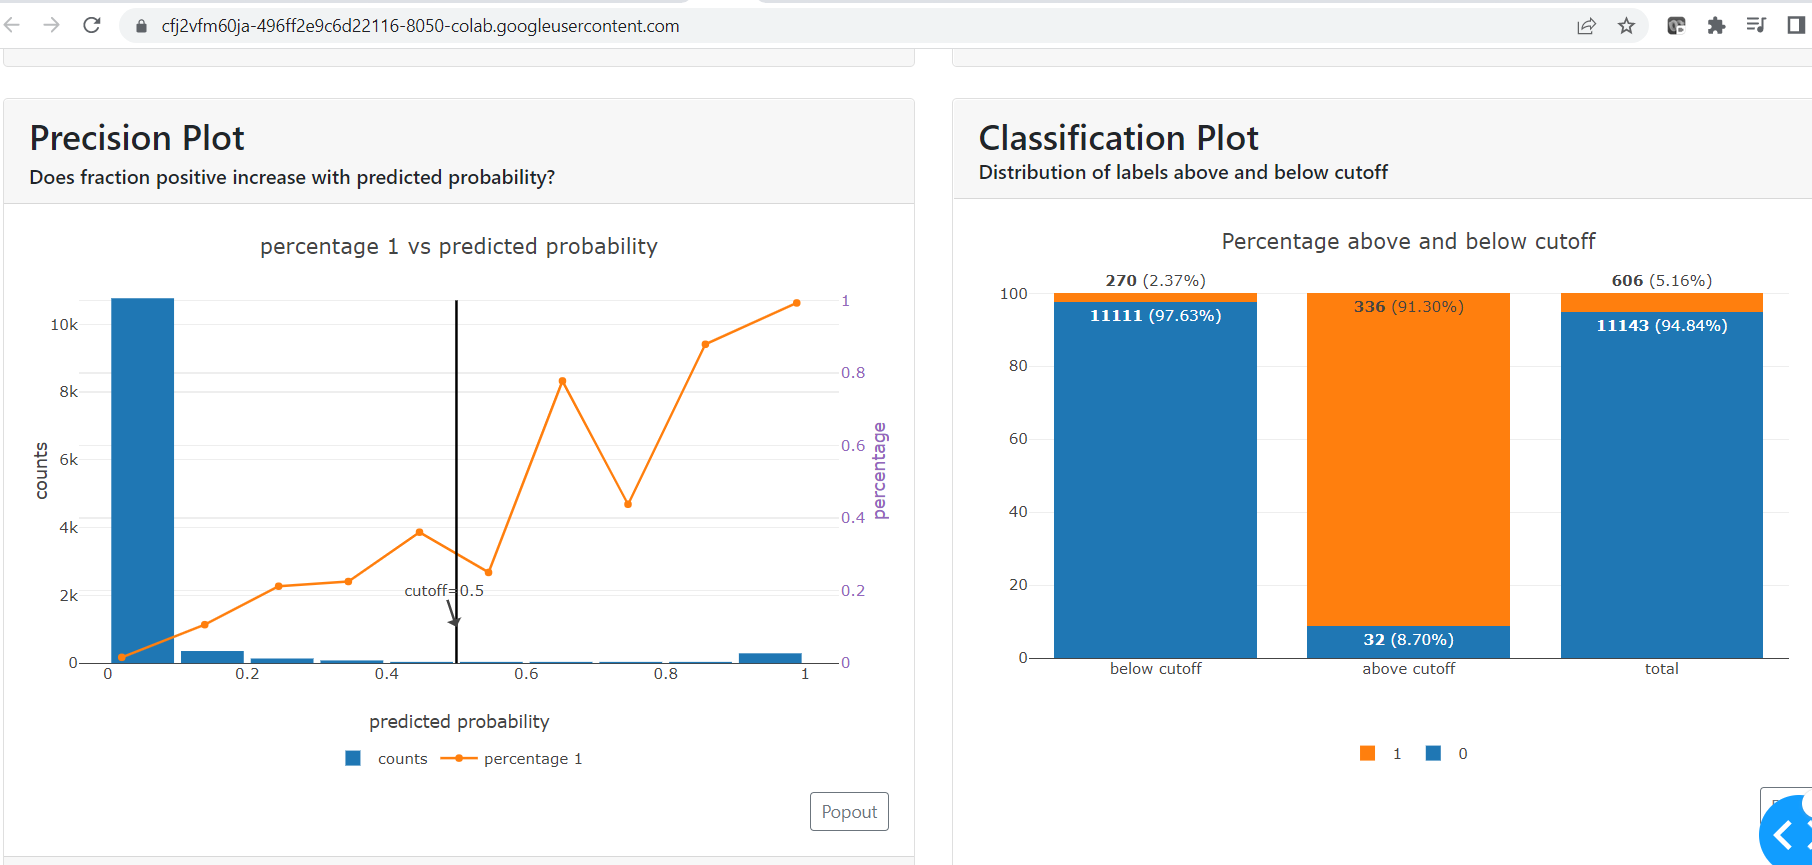

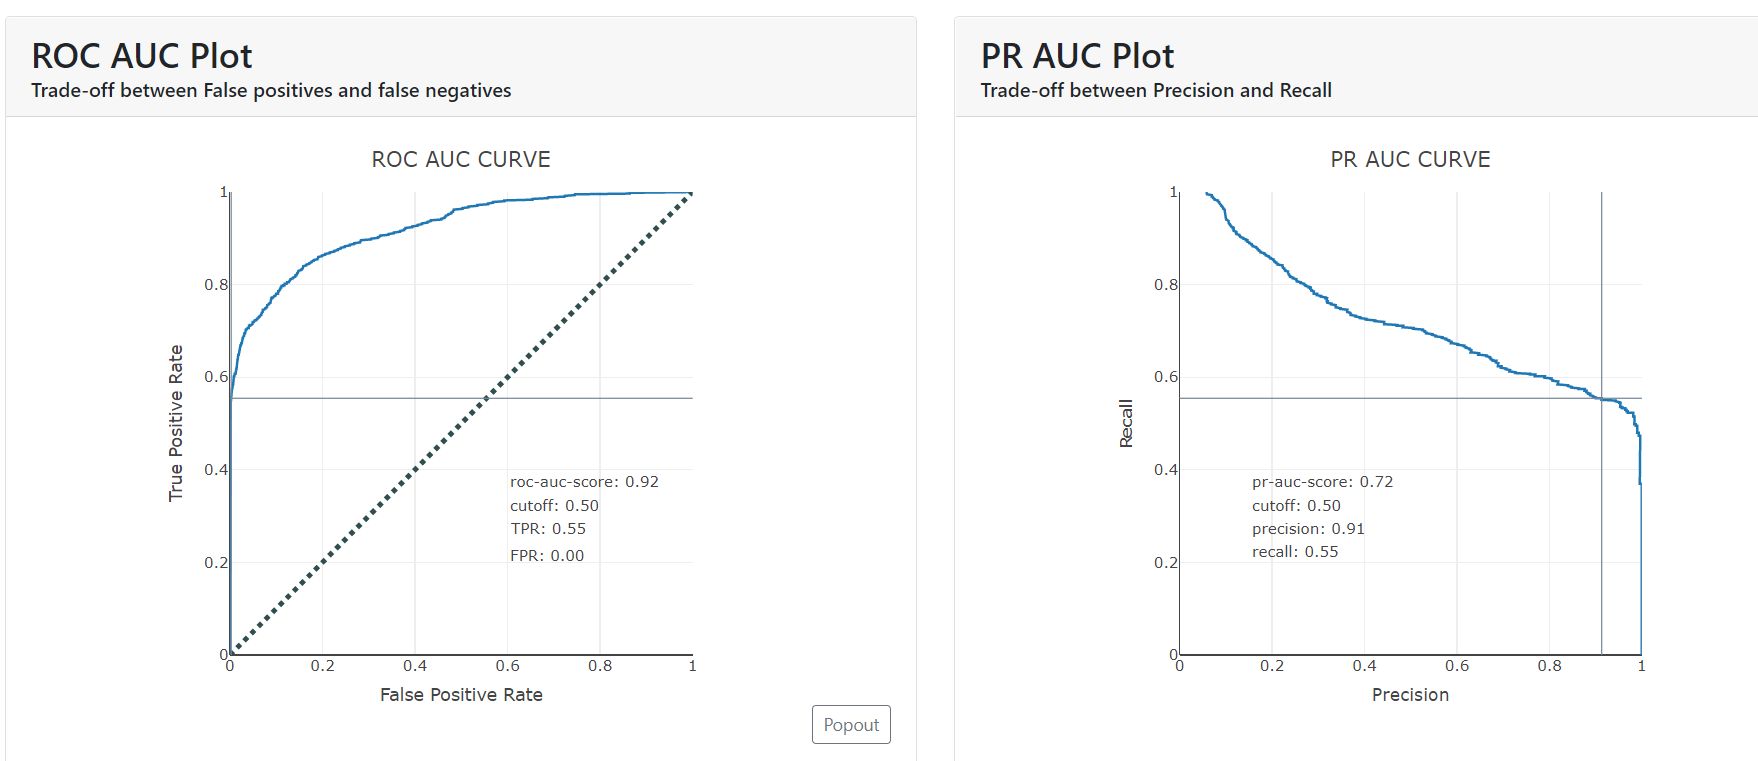

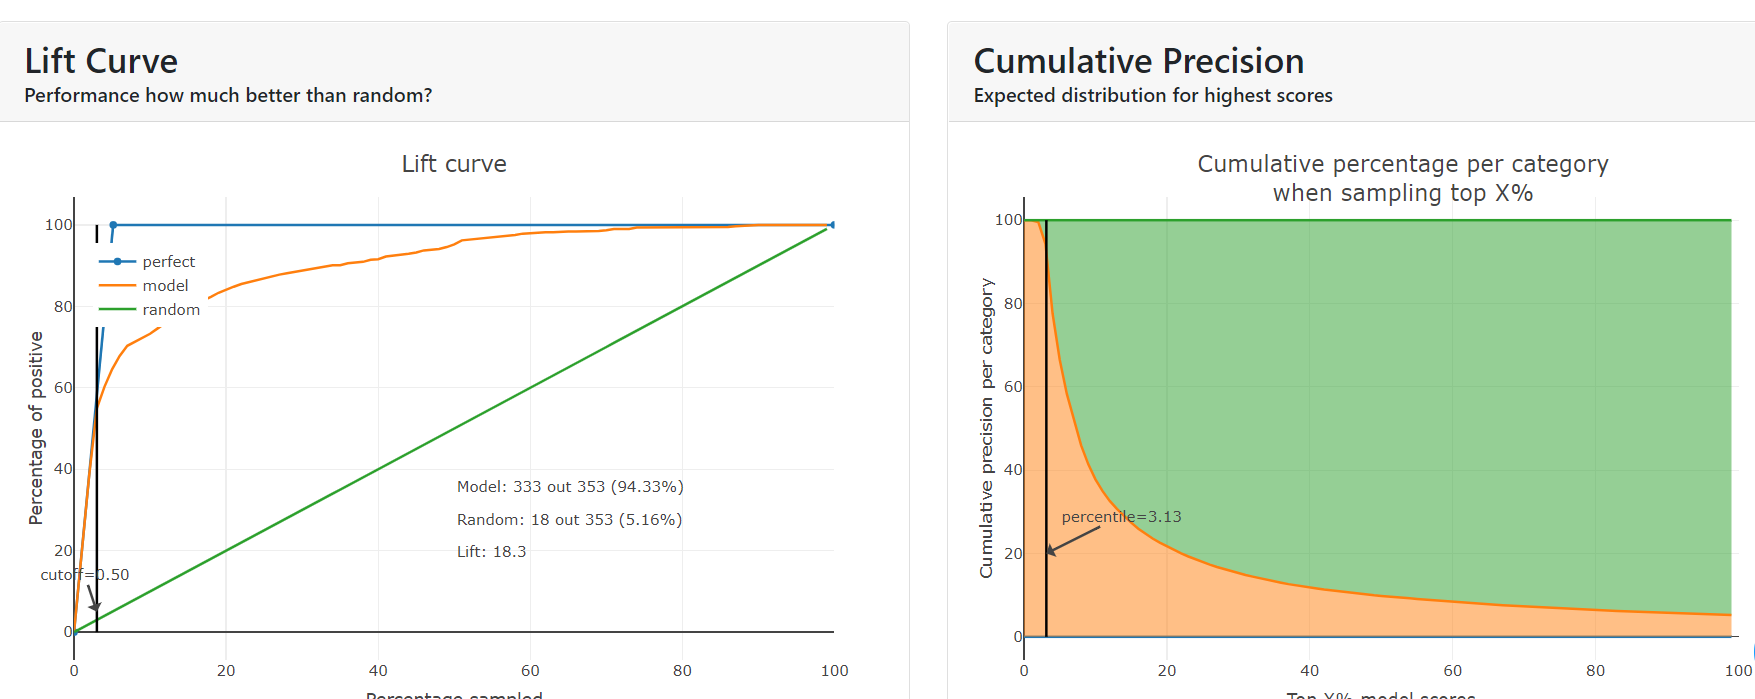

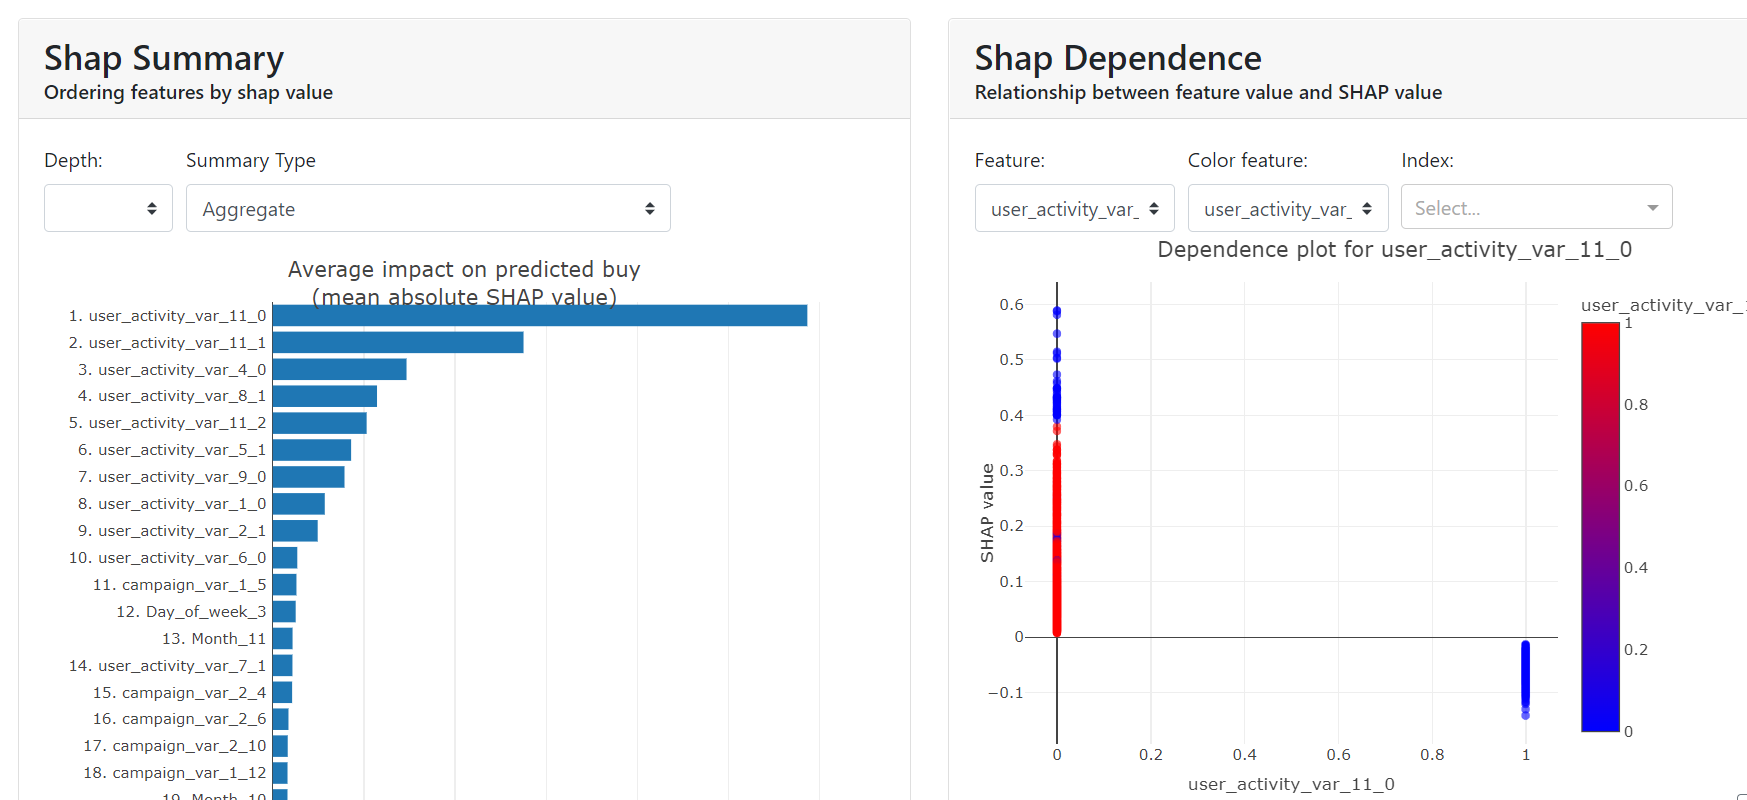